In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-07-10 23:58:27,669 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-10 23:58:27,670 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-07-10 23:58:27,671 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-10 23:58:27,671 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-07-10 23:58:27,672 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [6]:
def spec(ray_, lmin, lmax,ins, num, dlam=0.001, dlam2=0.00997,col='deeppink', noise=10,
         line=None, el=None, rom_num=None, lrest=None, gamma=None, f_value=None, 
         DIY=False, center=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    sg2 = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam2)

    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
        sg2.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg2.make_spectrum(ray, lines=[DIY_line])
        sg2.add_gaussian_noise(noise)
        sg2.save_spectrum('spec2.txt')



    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        
        sg2.make_spectrum(ray, lines=[line])
        sg2.add_gaussian_noise(noise)
        sg2.save_spectrum('spec2.txt')



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f2 = np.loadtxt('spec2.txt')
    lam2 = f2[:,0] # All rows, 1st column
    flux2 = f2[:,2]

    tog = np.array([lam, flux, lam2, flux2])
    arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))

    fig = plt.figure(figsize=(15, 5))
    if center==False:
        plt.text(0.836,0.15, 'S/N = '+str(noise), transform=fig.transFigure, fontsize=12)
        
    else:
        plt.text(0.49,0.15, 'S/N = '+str(noise), transform=fig.transFigure, fontsize=12)

    plt.step(tog[2], tog[3], color='dimgrey', label=ins, linewidth=1.7, where='mid', alpha=0.8)
    plt.plot(tog[0], tog[1], color=col, label= 'd$\lambda$= ' +str(dlam), alpha=0.8, linewidth=2.2)
        
    if DIY==False:
        plt.title(line+ ' (Ray ' + num + ')', fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+ ' (Ray ' + num + ')', 
                  fontsize=14)
    
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)
    plt.xlim(lmin, lmax)

In [5]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)

yt : [INFO     ] 2022-07-08 15:11:15,700 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-07-08 15:11:15,703 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-07-08 15:11:16,358 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-07-08 15:11:16,440 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-07-08 15:11:16,440 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-07-08 15:11:16,441 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-07-08 15:11:16,441 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

# Ly a

yt : [INFO     ] 2022-07-08 15:11:52,667 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:11:52,679 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:11:52,700 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-08 15:11:52,707 Identified 1.210e+02 octs
yt : [INFO     ] 2022-07-08 15:11:52,808 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:11:52,822 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:01<00:00, 145.78it/s]
yt : [INFO     ] 2022-07-08 15:11:54,611 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-08 15:11:54,611 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:11:54,710 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 779.49it/s] 
yt : [INFO     ] 2022-07-08 15:11:55,068 Not adding continuum Ly C: insufficient col

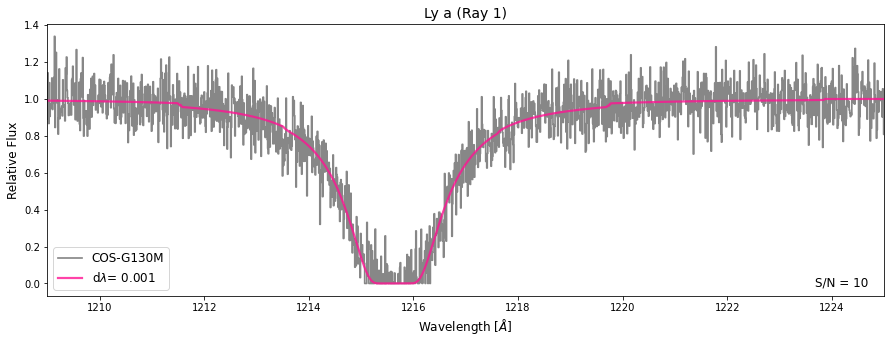

In [7]:
spec(ray_=ray1, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-08 15:11:55,478 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:11:55,481 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:11:55,491 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-08 15:11:55,495 Identified 1.210e+02 octs
yt : [INFO     ] 2022-07-08 15:11:55,588 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:11:55,592 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 559.97it/s] 
yt : [INFO     ] 2022-07-08 15:11:56,088 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-08 15:11:56,089 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:11:56,193 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2437.86it/s]
yt : [INFO     ] 2022-07-08 15:11:56,328 Not adding continuum Ly C: insufficient co

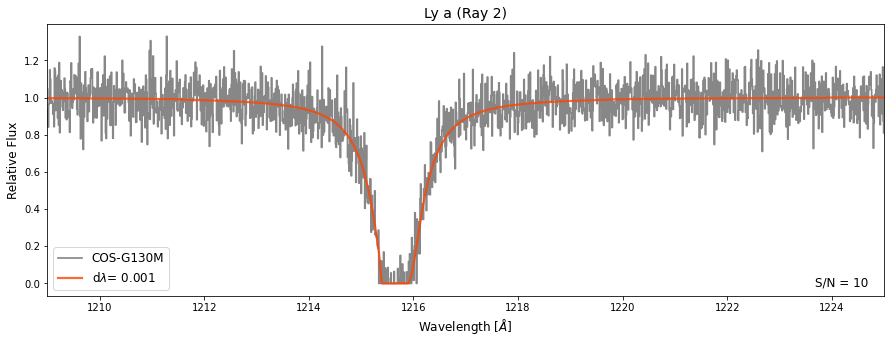

In [8]:
spec(ray_=ray2, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:12:07,121 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:07,136 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:07,152 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-08 15:12:07,158 Identified 1.210e+02 octs
yt : [INFO     ] 2022-07-08 15:12:07,252 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:12:07,256 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:09<00:00, 27.29it/s] 
yt : [INFO     ] 2022-07-08 15:12:16,670 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-08 15:12:16,671 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:12:17,634 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1304.13it/s]
yt : [INFO     ] 2022-07-08 15:12:17,857 Not adding continuum Ly C: insufficient col

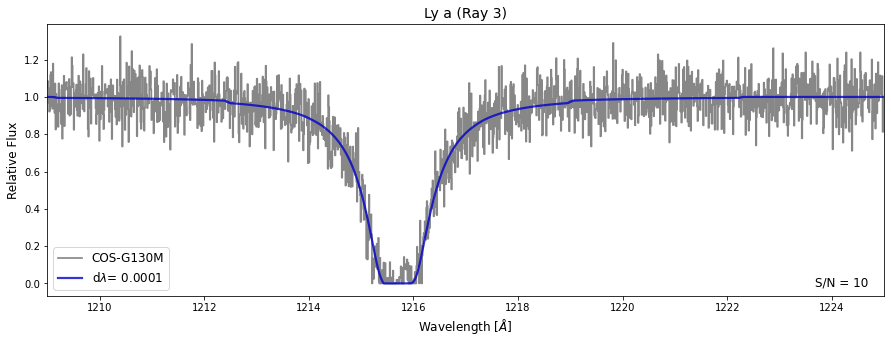

In [9]:
spec(ray_=ray3, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='3', dlam=0.0001, col='mediumblue')

# Si II 1526

yt : [INFO     ] 2022-07-08 15:12:24,890 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:24,902 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:24,911 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:12:24,961 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2785.85it/s]
yt : [INFO     ] 2022-07-08 15:12:25,087 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:12:25,113 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7026.00it/s]
yt : [INFO     ] 2022-07-08 15:12:25,178 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

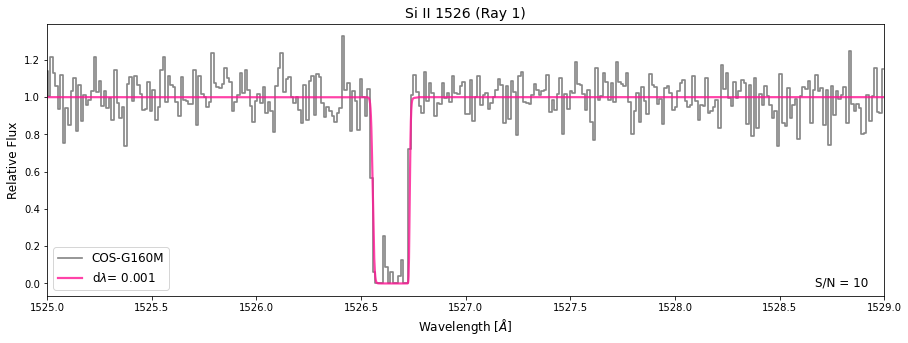

In [10]:
spec(ray1, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-07-08 15:12:41,770 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:41,782 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:41,790 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:12:41,796 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9541.23it/s]
yt : [INFO     ] 2022-07-08 15:12:41,867 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:12:41,896 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17142.02it/s]
yt : [INFO     ] 2022-07-08 15:12:41,947 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

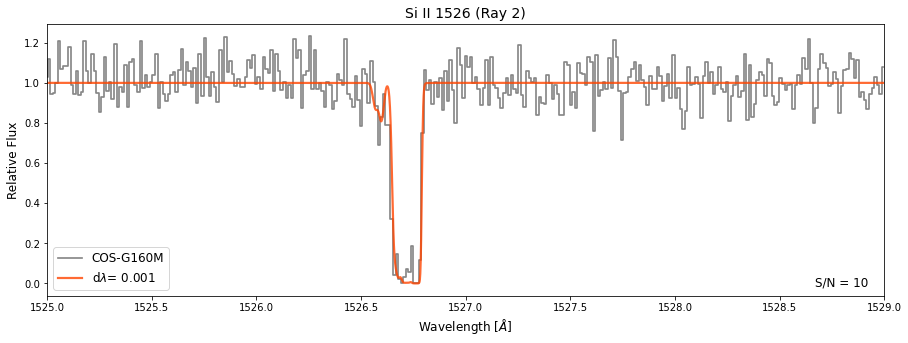

In [12]:
spec(ray2, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:12:56,711 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:56,722 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:12:56,796 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:12:56,799 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4505.37it/s]
yt : [INFO     ] 2022-07-08 15:12:56,889 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:12:56,916 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10500.73it/s]
yt : [INFO     ] 2022-07-08 15:12:56,970 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

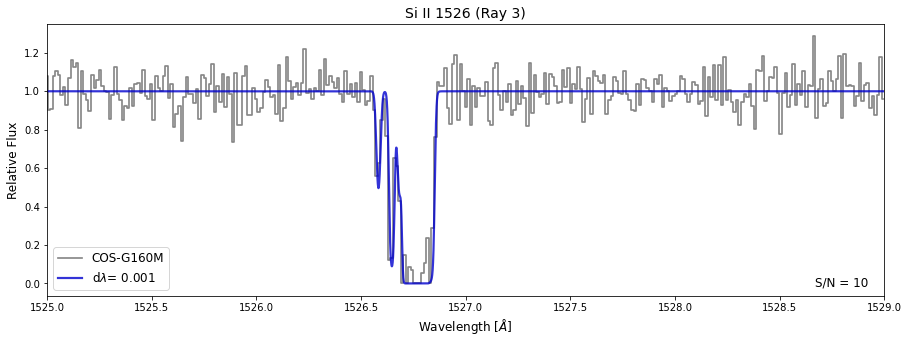

In [14]:
spec(ray3, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='mediumblue')

# Si III 1206

yt : [INFO     ] 2022-07-08 15:13:25,176 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:13:25,189 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:13:25,198 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:13:25,230 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2921.54it/s]
yt : [INFO     ] 2022-07-08 15:13:25,438 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:13:25,464 Creating spectrum
yt : [INFO     ] 2022-07-08 15:13:25,493 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5658.87it/s]
yt : [INFO     ] 2022-07-08 15:13:25,540 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5546.02it/s]
yt : [INFO     ] 2022-07-08 15:

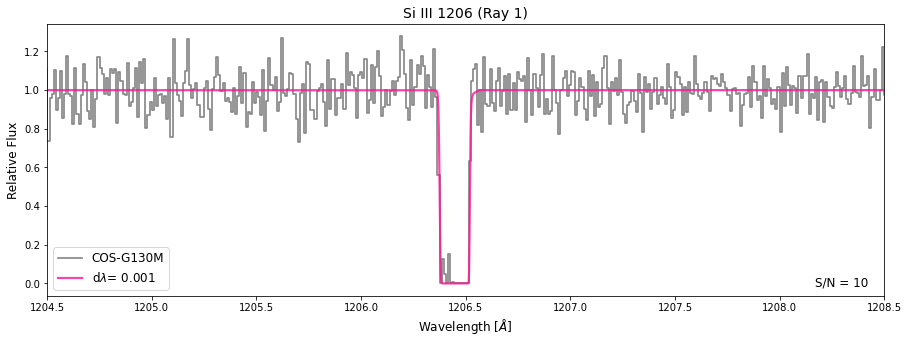

In [16]:
spec(ray1, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-08 15:13:34,723 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:13:34,736 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:13:34,742 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:13:34,748 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8761.52it/s]
yt : [INFO     ] 2022-07-08 15:13:34,851 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:13:34,878 Creating spectrum
yt : [INFO     ] 2022-07-08 15:13:34,906 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13821.56it/s]
yt : [INFO     ] 2022-07-08 15:13:34,926 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13338.08it/s]
yt : [INFO     ] 2022-07-08 1

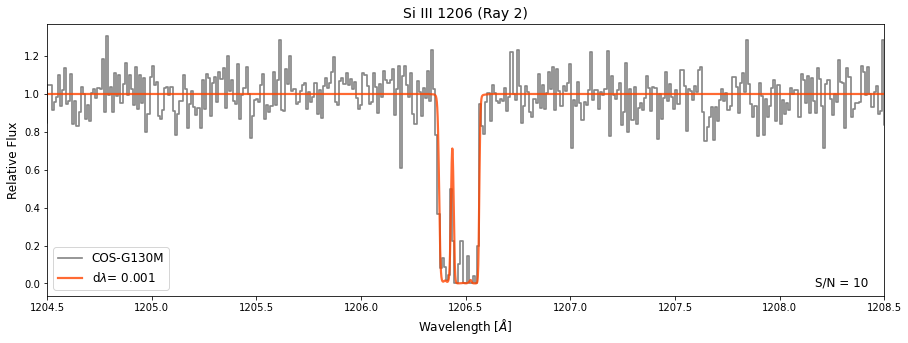

In [18]:
spec(ray2, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:13:47,371 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:13:47,385 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:13:47,393 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:13:47,399 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4583.02it/s]
yt : [INFO     ] 2022-07-08 15:13:47,554 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:13:47,575 Creating spectrum
yt : [INFO     ] 2022-07-08 15:13:47,604 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8358.05it/s]
yt : [INFO     ] 2022-07-08 15:13:47,636 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8032.60it/s]
yt : [INFO     ] 2022-07-08 15:

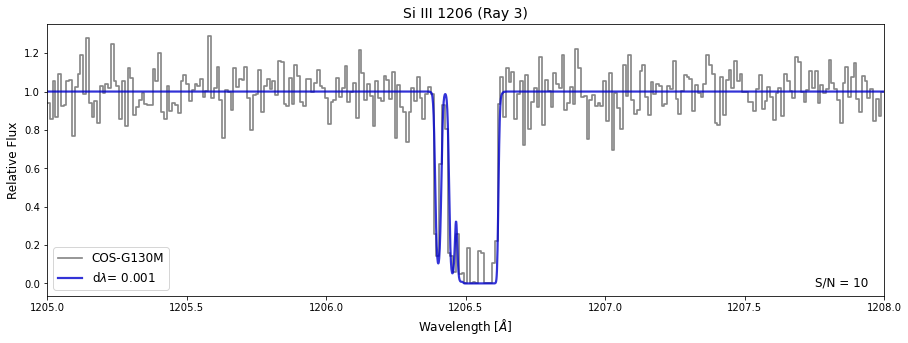

In [19]:
spec(ray3, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='mediumblue')

# Si IV 1393

yt : [INFO     ] 2022-07-08 15:14:57,457 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:14:57,470 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:14:57,478 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:14:57,510 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3696.12it/s]
yt : [INFO     ] 2022-07-08 15:14:57,614 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:14:57,640 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7180.30it/s]
yt : [INFO     ] 2022-07-08 15:14:57,706 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

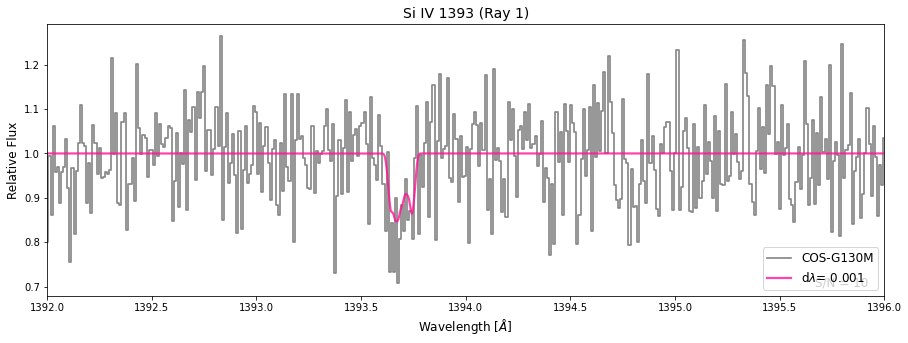

In [20]:
spec(ray1, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-08 15:15:06,751 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:15:06,764 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:15:06,771 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:15:06,775 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10078.30it/s]
yt : [INFO     ] 2022-07-08 15:15:06,840 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:15:06,867 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16392.50it/s]
yt : [INFO     ] 2022-07-08 15:15:06,916 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

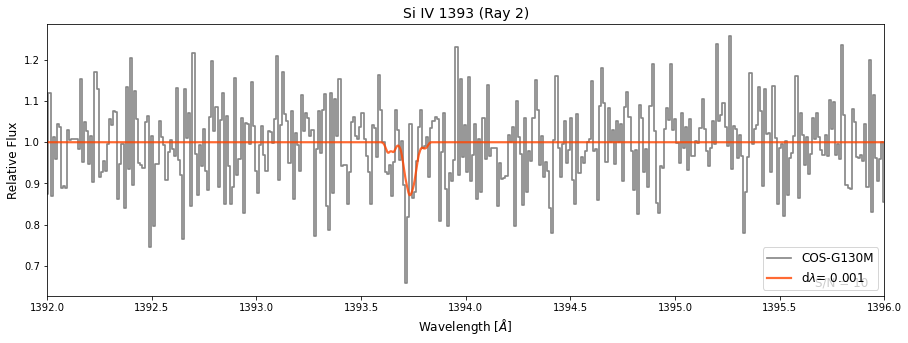

In [21]:
spec(ray2, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:19:31,680 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:31,691 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:31,700 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:19:31,705 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5409.52it/s]
yt : [INFO     ] 2022-07-08 15:19:31,798 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:19:31,824 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10259.63it/s]
yt : [INFO     ] 2022-07-08 15:19:31,878 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

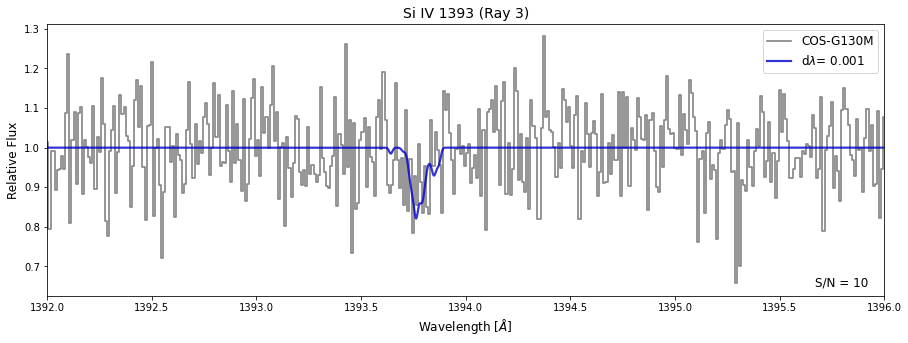

In [22]:
spec(ray3, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='3', col='mediumblue')

# C II 1334

yt : [INFO     ] 2022-07-08 15:19:48,495 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:48,505 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:48,515 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:19:48,542 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2727.61it/s]
yt : [INFO     ] 2022-07-08 15:19:48,673 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:19:48,699 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5426.14it/s]
yt : [INFO     ] 2022-07-08 15:19:48,775 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

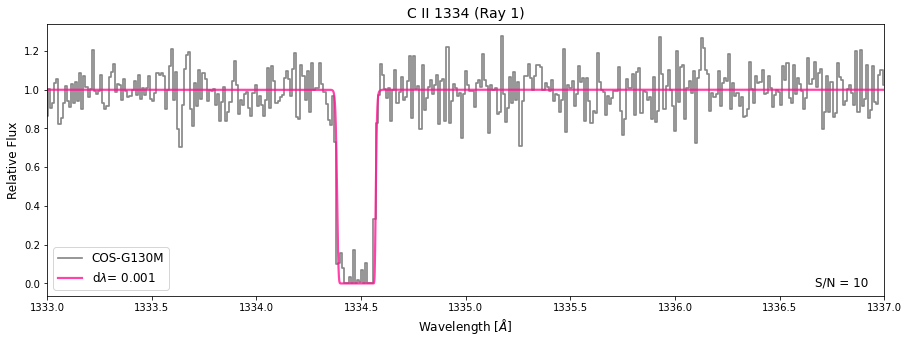

In [23]:
spec(ray1, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-08 15:19:49,554 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:49,567 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:49,575 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:19:49,580 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8892.64it/s]
yt : [INFO     ] 2022-07-08 15:19:49,652 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:19:49,683 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14716.05it/s]
yt : [INFO     ] 2022-07-08 15:19:49,735 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

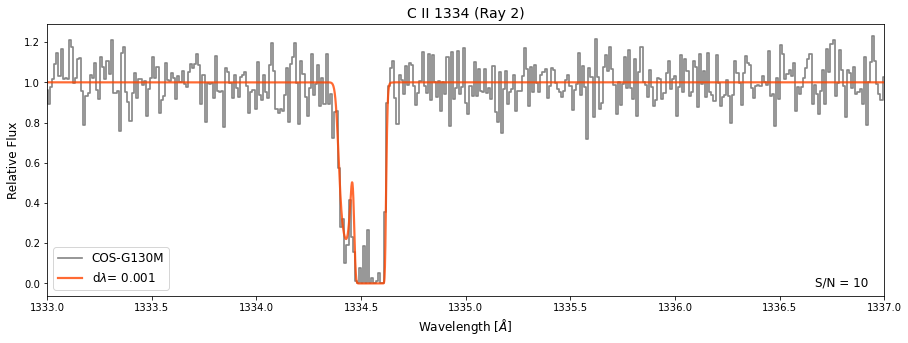

In [24]:
spec(ray2, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:19:56,499 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:56,511 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:19:56,520 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:19:56,525 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4373.09it/s]
yt : [INFO     ] 2022-07-08 15:19:56,627 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:19:56,653 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8210.10it/s]
yt : [INFO     ] 2022-07-08 15:19:56,714 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

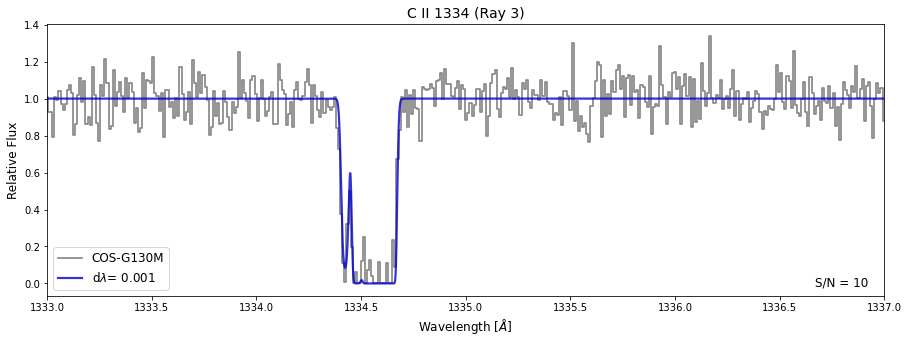

In [25]:
spec(ray3, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='3', col='mediumblue')

# C III 977

yt : [INFO     ] 2022-07-08 15:21:30,854 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:30,867 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:30,875 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:21:30,895 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2797.45it/s]
yt : [INFO     ] 2022-07-08 15:21:31,119 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:21:31,146 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5392.65it/s]
yt : [INFO     ] 2022-07-08 15:21:31,270 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

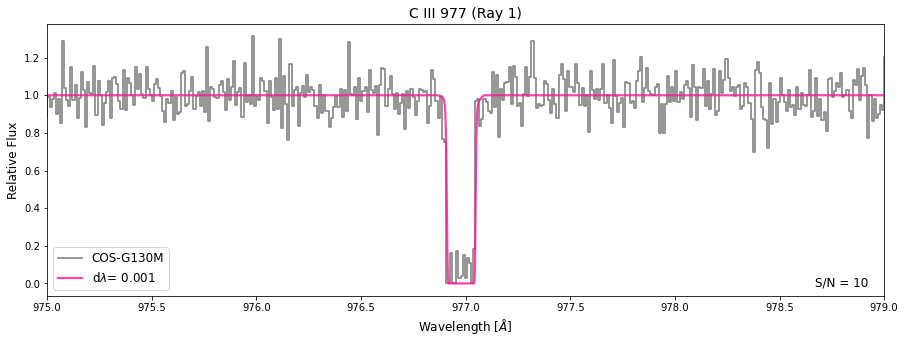

In [26]:
spec(ray1, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='1')


yt : [INFO     ] 2022-07-08 15:21:31,874 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:31,890 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:31,898 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:21:31,903 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8130.10it/s]
yt : [INFO     ] 2022-07-08 15:21:32,011 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:21:32,038 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 13260.00it/s]
yt : [INFO     ] 2022-07-08 15:21:32,107 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obje

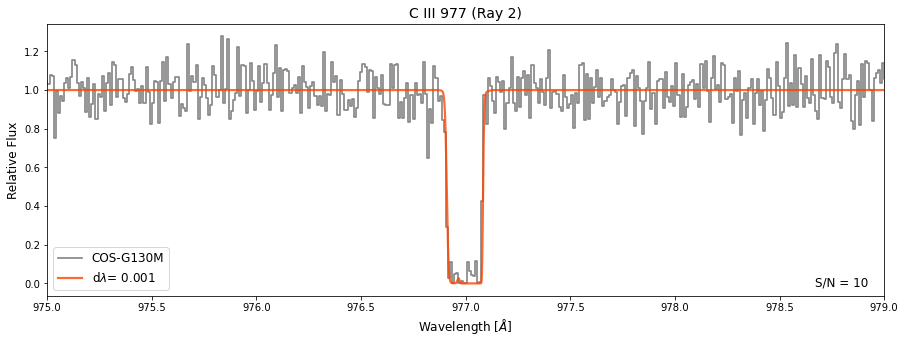

In [27]:
spec(ray2, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:21:40,786 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:40,799 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:40,808 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:21:40,816 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4367.56it/s]
yt : [INFO     ] 2022-07-08 15:21:40,976 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:21:41,003 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 7709.18it/s]
yt : [INFO     ] 2022-07-08 15:21:41,099 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

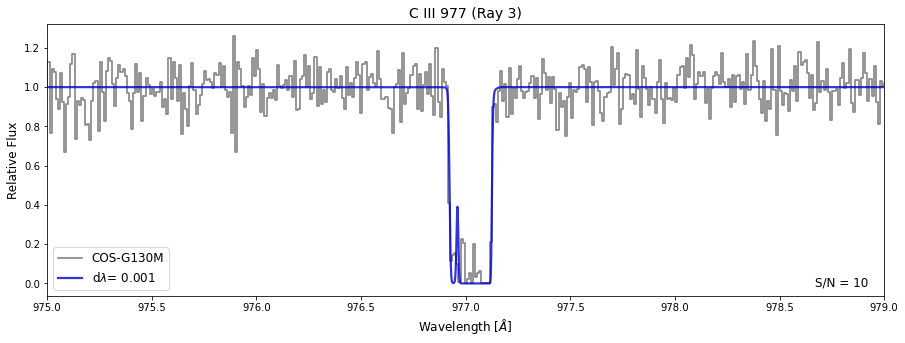

In [28]:
spec(ray3, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='3', col='mediumblue')

# C IV 1548

yt : [INFO     ] 2022-07-08 15:21:45,098 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:45,112 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:45,120 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:21:45,141 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5289.47it/s]
yt : [INFO     ] 2022-07-08 15:21:45,227 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:21:45,247 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6312.60it/s]
yt : [INFO     ] 2022-07-08 15:21:45,317 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

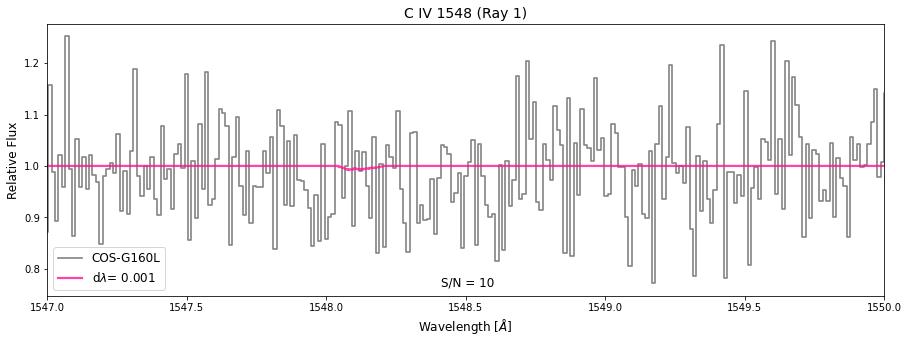

In [29]:
spec(ray1, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160L', num='1', center=True)

yt : [INFO     ] 2022-07-08 15:21:52,701 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:52,715 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:21:52,723 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:21:52,728 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5177.15it/s]
yt : [INFO     ] 2022-07-08 15:21:52,821 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:21:52,842 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6515.66it/s]
yt : [INFO     ] 2022-07-08 15:21:52,912 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

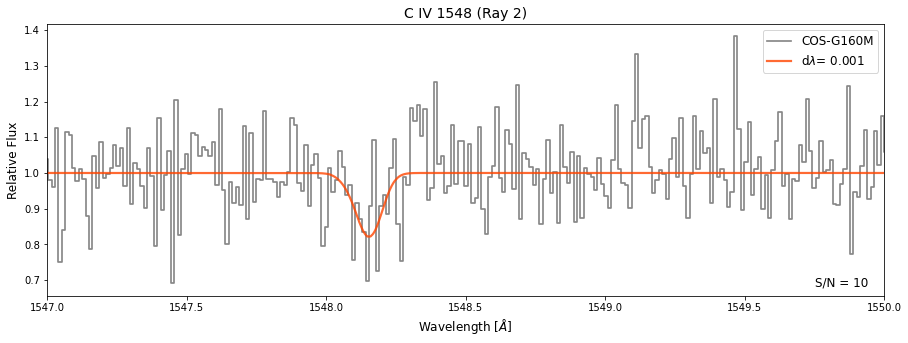

In [30]:
spec(ray2, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:22:10,448 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:10,459 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:10,469 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:22:10,474 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5451.91it/s]
yt : [INFO     ] 2022-07-08 15:22:10,566 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:22:10,586 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6431.21it/s]
yt : [INFO     ] 2022-07-08 15:22:10,655 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

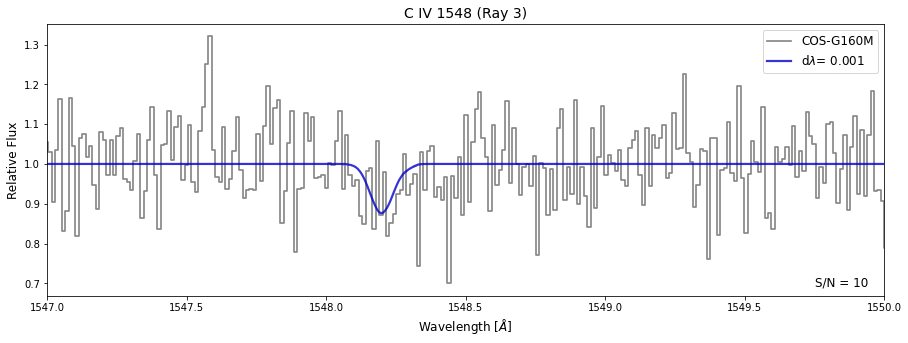

In [31]:
spec(ray3, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='3', col='mediumblue')

# O I 1302

yt : [INFO     ] 2022-07-08 15:22:20,803 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:20,814 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:20,824 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:22:20,853 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2794.70it/s]
yt : [INFO     ] 2022-07-08 15:22:20,982 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:22:21,008 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6021.53it/s]
yt : [INFO     ] 2022-07-08 15:22:21,080 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

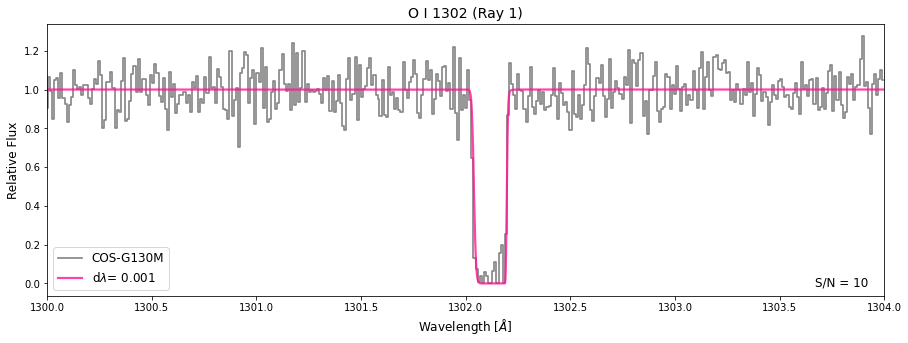

In [32]:
spec(ray1, 1300, 1304, line='O I 1302', ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-08 15:22:25,173 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:25,185 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:25,193 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:22:25,198 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9824.97it/s]
yt : [INFO     ] 2022-07-08 15:22:25,269 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:22:25,297 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16224.08it/s]
yt : [INFO     ] 2022-07-08 15:22:25,346 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object'

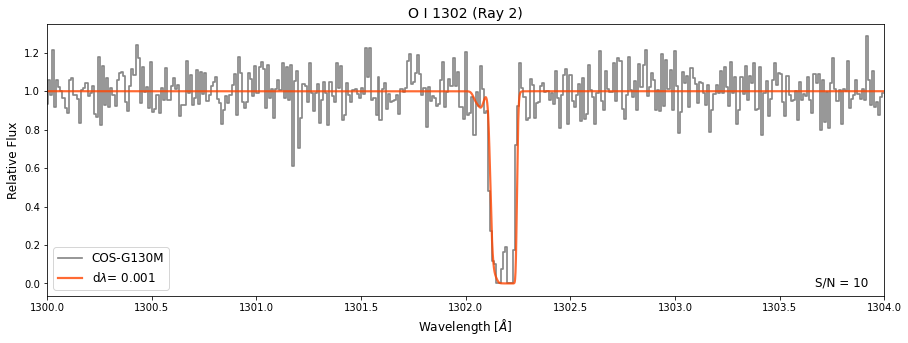

In [33]:
spec(ray2, 1300, 1304, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:22:48,431 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:48,444 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:48,452 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4646.60it/s]
yt : [INFO     ] 2022-07-08 15:22:48,555 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:22:48,581 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9182.54it/s]
yt : [INFO     ] 2022-07-08 15:22:48,638 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


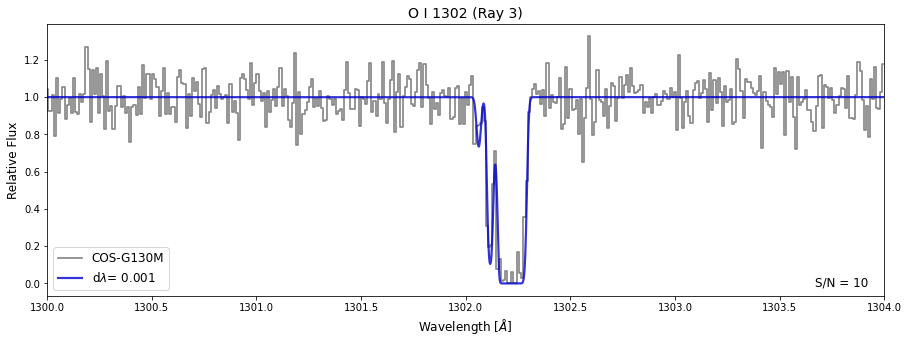

In [35]:
spec(ray3, 1300, 1304, line='O I 1302', ins='COS-G130M', num='3', col='mediumblue')

# O II 834

yt : [INFO     ] 2022-07-08 15:22:53,207 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:53,220 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:22:53,229 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:22:53,254 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 2655.40it/s]
yt : [INFO     ] 2022-07-08 15:22:53,545 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:22:53,571 Creating spectrum
yt : [INFO     ] 2022-07-08 15:22:53,598 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 10813.44it/s]
yt : [INFO     ] 2022-07-08 15:22:53,623 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 10556.38it/s]
yt : [INFO     ] 2022-07-08 15:22:53,649 7

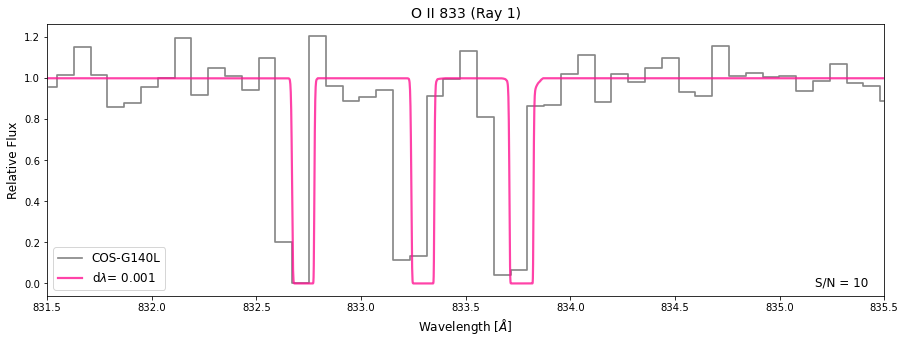

In [36]:
spec(ray1, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='1')

yt : [INFO     ] 2022-07-08 15:23:11,595 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:23:11,607 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:23:11,615 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:23:11,622 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 8199.63it/s]
yt : [INFO     ] 2022-07-08 15:23:11,753 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:23:11,780 Creating spectrum
yt : [INFO     ] 2022-07-08 15:23:11,808 21 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 21153.31it/s]
yt : [INFO     ] 2022-07-08 15:23:11,822 21 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 20763.88it/s]
yt : [INFO     ] 2022-07-08 15:23:11,836 2

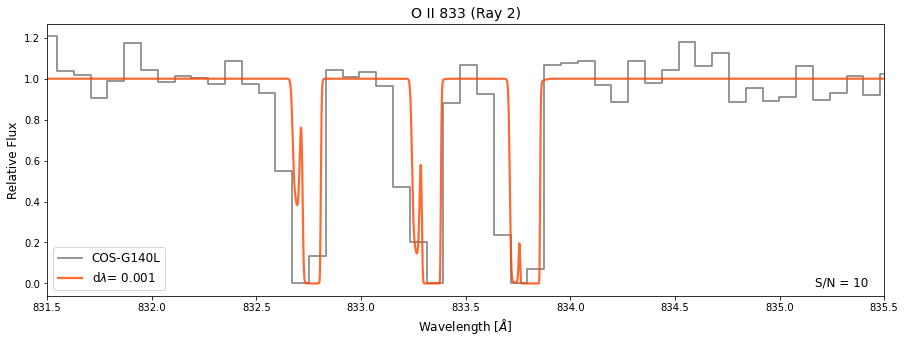

In [37]:
spec(ray2, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='2', col='orangered')
plt.legend(loc='lower left', fontsize=12)

yt : [INFO     ] 2022-07-08 15:24:00,541 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:00,555 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:00,562 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:00,569 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 4245.85it/s]
yt : [INFO     ] 2022-07-08 15:24:00,773 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:00,799 Creating spectrum
yt : [INFO     ] 2022-07-08 15:24:00,827 47 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 14575.02it/s]
yt : [INFO     ] 2022-07-08 15:24:00,847 47 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 14990.95it/s]
yt : [INFO     ] 2022-07-08 15:24:00,865 4

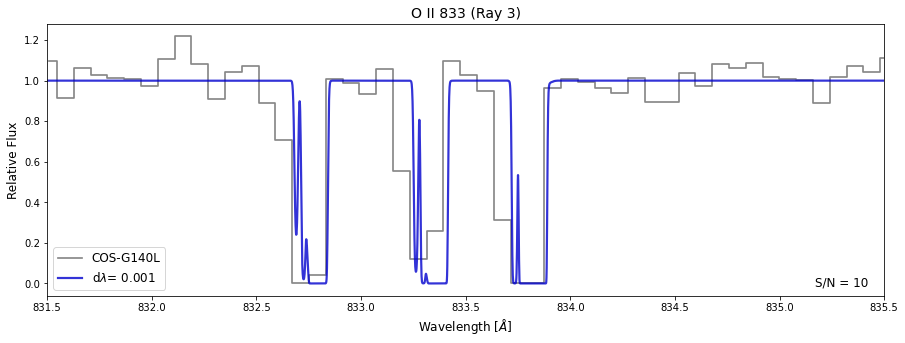

In [38]:
spec(ray3, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='3', col='mediumblue')

# Al II 1670

yt : [INFO     ] 2022-07-08 15:24:16,792 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:16,803 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:16,811 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:16,849 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2646.71it/s]
yt : [INFO     ] 2022-07-08 15:24:16,980 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:17,006 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 5894.56it/s]
yt : [INFO     ] 2022-07-08 15:24:17,079 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

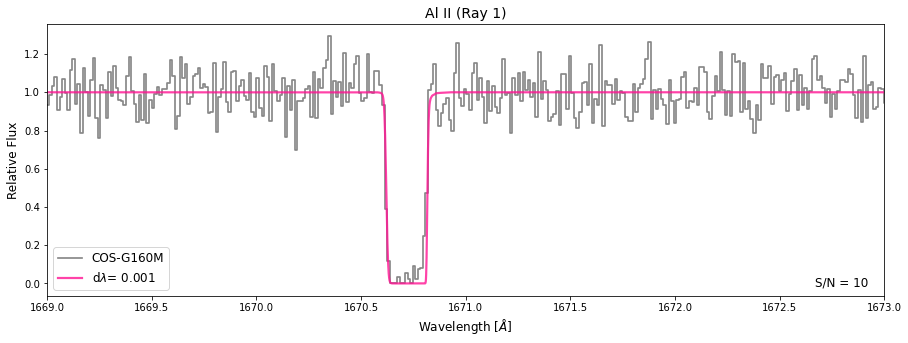

In [39]:
spec(ray1, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-07-08 15:24:17,770 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:17,783 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:17,793 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:17,800 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8803.26it/s]
yt : [INFO     ] 2022-07-08 15:24:17,875 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:17,904 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 15492.55it/s]
yt : [INFO     ] 2022-07-08 15:24:17,952 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

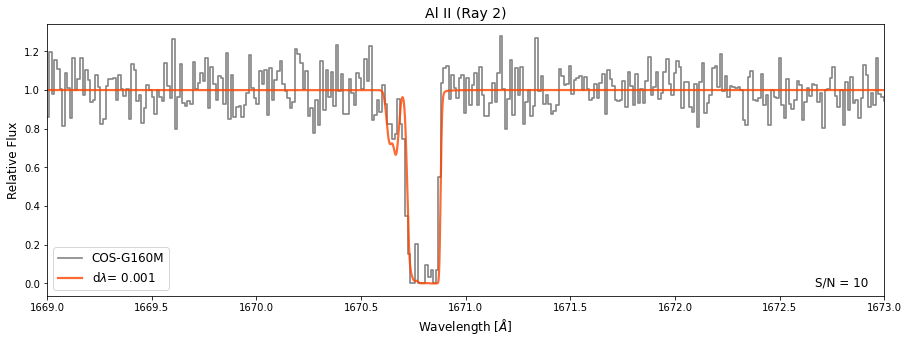

In [40]:
spec(ray2, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-07-08 15:24:30,321 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:30,333 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:30,343 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:30,349 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4544.48it/s]
yt : [INFO     ] 2022-07-08 15:24:30,450 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:30,476 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8781.30it/s]
yt : [INFO     ] 2022-07-08 15:24:30,535 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

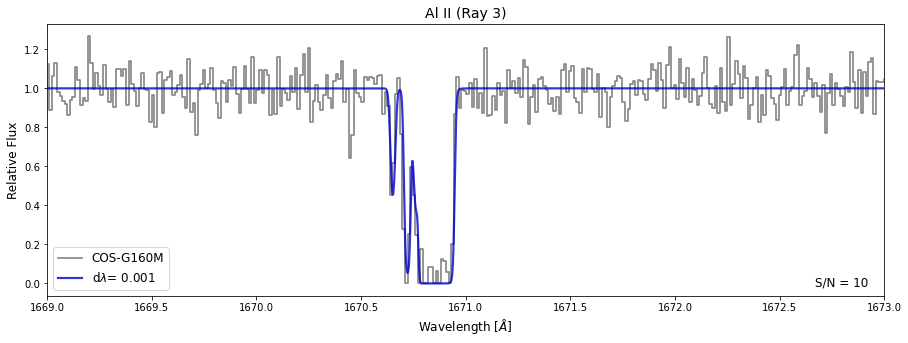

In [41]:
spec(ray3, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='3',col='mediumblue')

# Al III 1854

yt : [INFO     ] 2022-07-08 15:24:34,275 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:34,289 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:34,296 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:34,328 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3572.38it/s]
yt : [INFO     ] 2022-07-08 15:24:34,435 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:34,461 Creating spectrum
yt : [INFO     ] 2022-07-08 15:24:34,489 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8299.33it/s]
yt : [INFO     ] 2022-07-08 15:24:34,521 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

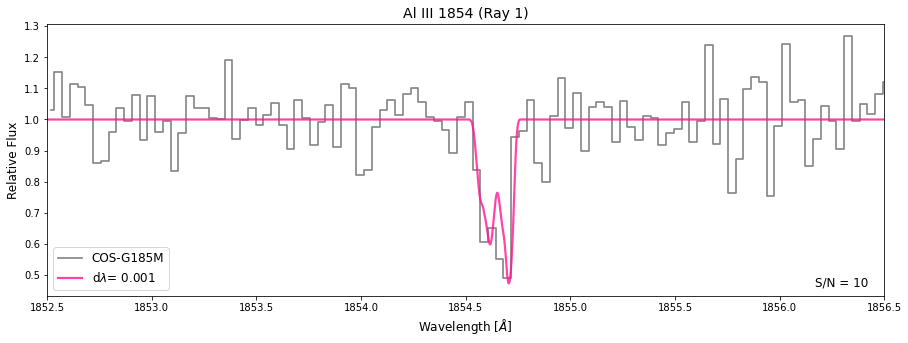

In [42]:
spec(ray1, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='1')

yt : [INFO     ] 2022-07-08 15:24:35,465 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:35,477 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:35,485 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:35,490 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11486.57it/s]
yt : [INFO     ] 2022-07-08 15:24:35,557 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:35,585 Creating spectrum
yt : [INFO     ] 2022-07-08 15:24:35,618 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 19976.96it/s]
yt : [INFO     ] 2022-07-08 15:24:35,633 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

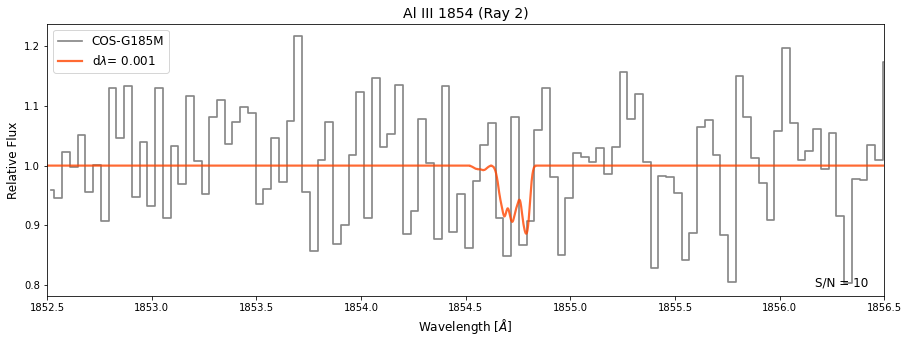

In [43]:
spec(ray2, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='2', col='orangered',
    dlam=0.001)

yt : [INFO     ] 2022-07-08 15:24:53,171 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:53,185 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:24:53,193 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:24:53,197 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5835.68it/s]
yt : [INFO     ] 2022-07-08 15:24:53,287 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:24:53,312 Creating spectrum
yt : [INFO     ] 2022-07-08 15:24:53,341 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 12963.98it/s]
yt : [INFO     ] 2022-07-08 15:24:53,362 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

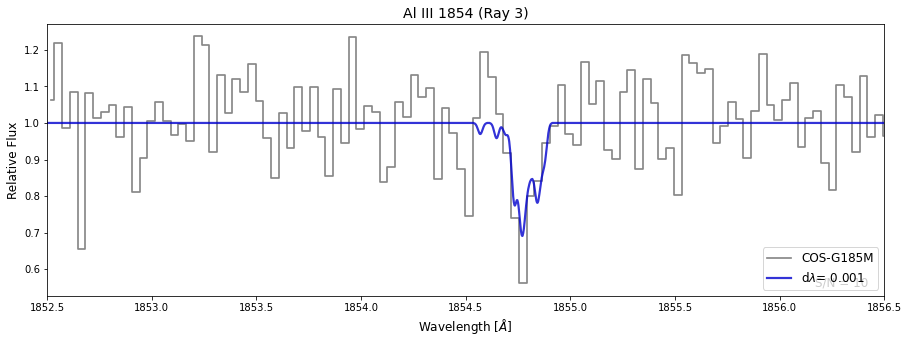

In [44]:
spec(ray3, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='3', col='mediumblue')

# Fe II 2600

yt : [INFO     ] 2022-07-08 15:25:00,561 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:00,572 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:00,582 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:00,647 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2688.21it/s]
yt : [INFO     ] 2022-07-08 15:25:00,776 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:00,802 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:00,830 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7122.62it/s]
yt : [INFO     ] 2022-07-08 15:25:00,868 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

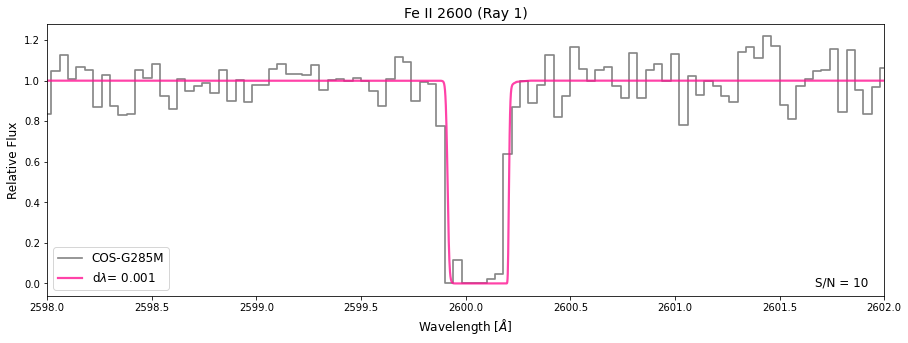

In [45]:
spec(ray1, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-07-08 15:25:04,691 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:04,702 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:04,711 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:04,716 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9080.58it/s]
yt : [INFO     ] 2022-07-08 15:25:04,788 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:04,816 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:04,845 15 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15856.31it/s]
yt : [INFO     ] 2022-07-08 15:25:04,863 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples

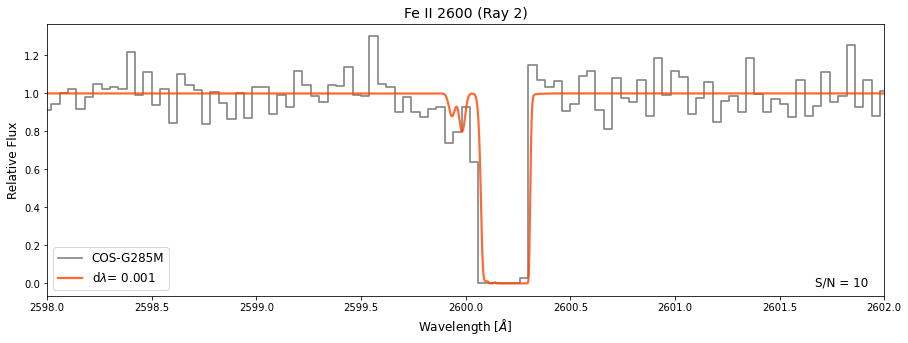

In [46]:
spec(ray2, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:25:18,086 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:18,100 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:18,109 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4550.79it/s]
yt : [INFO     ] 2022-07-08 15:25:18,211 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:18,237 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:18,265 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10603.50it/s]
yt : [INFO     ] 2022-07-08 15:25:18,291 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

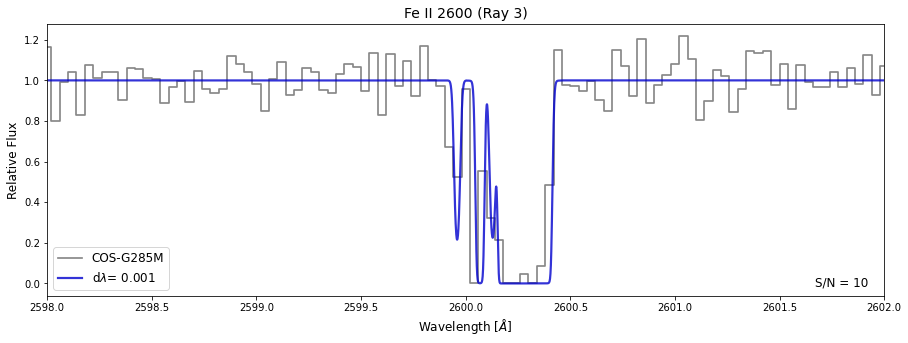

In [48]:
spec(ray3, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='mediumblue')

# Fe III 1122

yt : [INFO     ] 2022-07-08 15:25:22,881 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:22,893 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:22,902 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:22,950 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3735.91it/s]
yt : [INFO     ] 2022-07-08 15:25:23,051 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:23,076 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:23,105 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 6810.88it/s]
yt : [INFO     ] 2022-07-08 15:25:23,144 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

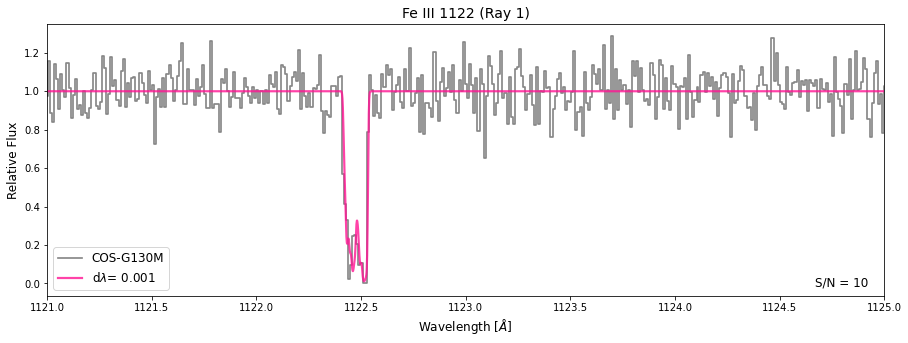

In [49]:
spec(ray1, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1')

yt : [INFO     ] 2022-07-08 15:25:27,648 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:27,658 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:27,667 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:27,671 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10499.60it/s]
yt : [INFO     ] 2022-07-08 15:25:27,735 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:27,763 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:27,795 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 15451.30it/s]
yt : [INFO     ] 2022-07-08 15:25:27,813 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

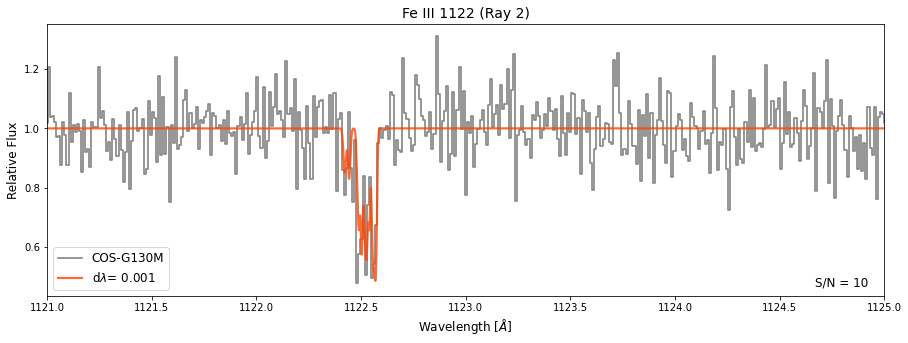

In [50]:
spec(ray2, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:25:39,193 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:39,205 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:39,213 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:39,218 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5678.05it/s]
yt : [INFO     ] 2022-07-08 15:25:39,307 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:39,335 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:39,364 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9805.41it/s]
yt : [INFO     ] 2022-07-08 15:25:39,392 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

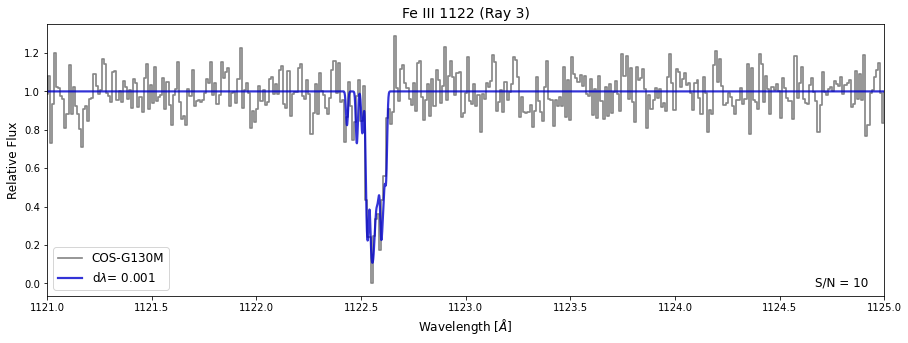

In [51]:
spec(ray3, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='mediumblue')

# Mg II 2796

yt : [INFO     ] 2022-07-08 15:25:50,137 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:50,148 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:50,156 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:50,191 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1882.99it/s]
yt : [INFO     ] 2022-07-08 15:25:50,361 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:50,387 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:50,416 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5826.50it/s]
yt : [INFO     ] 2022-07-08 15:25:50,461 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

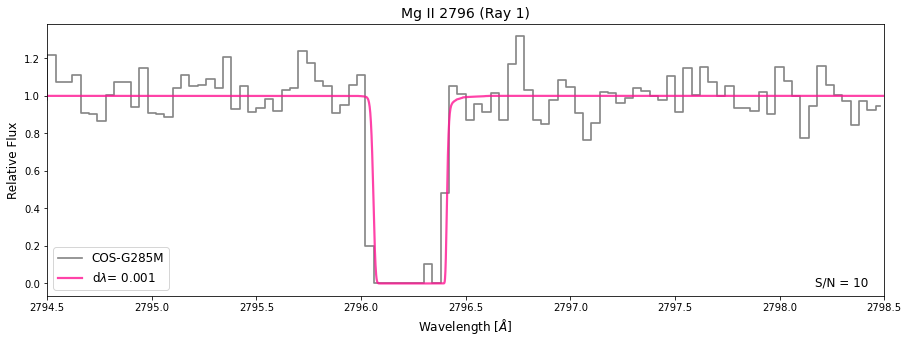

In [52]:
spec(ray1, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-07-08 15:25:58,655 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:58,666 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:25:58,675 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:25:58,680 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6920.98it/s]
yt : [INFO     ] 2022-07-08 15:25:58,760 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:25:58,789 Creating spectrum
yt : [INFO     ] 2022-07-08 15:25:58,819 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14932.16it/s]
yt : [INFO     ] 2022-07-08 15:25:58,838 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples

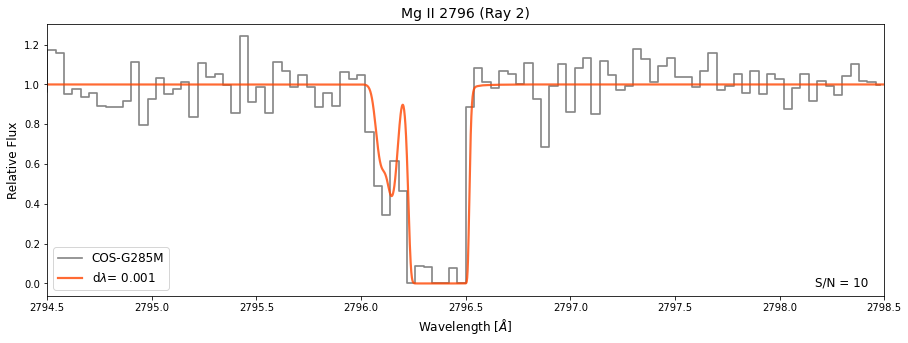

In [53]:
spec(ray2, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-07-08 15:26:12,824 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:26:12,839 Setting instrument to Custom
yt : [INFO     ] 2022-07-08 15:26:12,846 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-08 15:26:12,852 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3306.90it/s]
yt : [INFO     ] 2022-07-08 15:26:12,972 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-08 15:26:12,998 Creating spectrum
yt : [INFO     ] 2022-07-08 15:26:13,026 41 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8910.87it/s]
yt : [INFO     ] 2022-07-08 15:26:13,056 Writing spectrum to ascii file: spec2.txt.
<ipython-input-6-cb392e936dd5>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

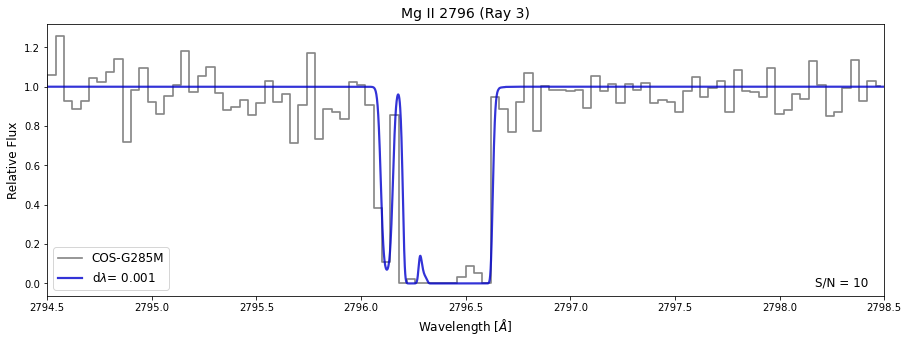

In [54]:
spec(ray3, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='mediumblue')